In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting
import operator
import csv

from __future__ import division
#from sympy import init_printing

In [5]:
from estimation_class2 import *

#Notebook for German Data Estimation with the latest results

##Defining the model and loading the data

In [15]:
# Here input your grid
knots= np.logspace(np.log(0.005), np.log(200.0), 1000,
                   endpoint=True, base=np.e)
est1 = HTWF_Estimation((0.0,1.0), (0.005, 200.0), (0.0,1.0), (0.005, 200.0), 14.0,
                       100000.0,knots)

In [16]:
est1.InitializeFunction()

In [17]:
est1.import_data('forestimation.csv', ID=True, weights=True, logs=False, yearly_w=True, change_weight=True,labels=False)


Note on the data:
- all variables are given in logs
- wages are annualised by multiplying: (daily wage)*360
- German data has weights to make sample representative of population which are used in the estimation

In [18]:
#Extracting the data and defining tolerance level for the solver
theta,wage,profit,wgt  = est1.data
toll = 1e-4

see Cristina's file for more detailed explanation on the solution method

# Comparing model solution and data for parameters that have worked best so far:

In [19]:


F_params = {'omega_A':0.0307315, 'omega_B':0.24014643, 'sigma_A': 0.83177002 , 'Big_A': 5.06956549}
functions = est1.Solve_Model(F_params, None, 'lsoda', 4500.0, toll)
w_theta, pi_theta, thetas, xs_fm = functions


Success! All workers and firms are matched


In [20]:
#Plot table with points form estimation - note that we need more points with a low x to get 
#more accurate results - we are working on a log-scale for the grid
est1.current_sol

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.005000,0.005000,0.017912,12935.090951,7.330992e+02
0.005053,0.009432,0.040119,12954.430276,1.644473e+03
0.005107,0.010615,0.046543,12974.555159,1.910754e+03
0.005162,0.011415,0.050960,12995.028497,2.095380e+03
0.005217,0.012045,0.054467,13015.739934,2.243139e+03
0.005272,0.012577,0.057445,13036.635755,2.369562e+03
0.005329,0.013046,0.060074,13057.683849,2.482031e+03
0.005385,0.013469,0.062457,13078.862651,2.584678e+03
0.005443,0.013860,0.064657,13100.156584,2.680070e+03


In [26]:
thetas = est1.current_sol['$\\theta(x)$'].values
ws = est1.current_sol['$w(x)$'].values
pis_fm = est1.current_sol['$\\pi(x)$'].values
xs_fm = est1.current_sol.index.values
ys_fm = est1.current_sol['$\\mu(x)$']

#now write these to csv file!!
with open('dummysol.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for x in range(0,len(ws)):
        spamwriter.writerow([thetas[x] ,ws[x] ,pis_fm[x]])
        
#nice job, next run the solver with this data!!        

##Solution for German Data:
This is the best solution for the German data so far, although the minimiser still hasn't finished. 

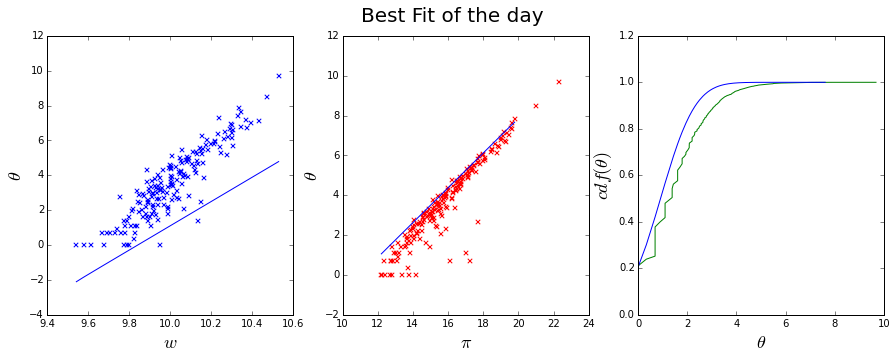

In [21]:
est1.Plot_solution()

In [22]:
ps = (0.0307315,0.24014643,0.83177002,5.06956549)


res = optimize.minimize(est1.StubbornObjectiveFunction, 
                        ps,args=(None, 1e-4, 4500.0), 
                        method='L-BFGS-B', jac=None, hess=None, hessp=None, 
                        bounds=((1e-2,1.0-1e-2),(1e-2,1.0-1e-2),(1e-2,1.0-1e-2),(1e-2,None)), options={'eps':1e-2})

Success! All workers and firms are matched
895.965465366 [ 0.0307315   0.24014643  0.83177002  5.06956549]
Success! All workers and firms are matched
895.965465366 [ 0.0307315   0.24014643  0.83177002  5.06956549]
Success! All workers and firms are matched
604.616140123 [ 0.0407315   0.24014643  0.83177002  5.06956549]
Success! All workers and firms are matched
1912.00218906 [ 0.0307315   0.25014643  0.83177002  5.06956549]
Success! All workers and firms are matched
925.413780449 [ 0.0307315   0.24014643  0.84177002  5.06956549]
Success! All workers and firms are matched
902.106272745 [ 0.0307315   0.24014643  0.83177002  5.07956549]
Success! All workers and firms are matched
16340.2209592 [ 0.21450187  0.19605649  0.67434071  4.10028713]
Success! All workers and firms are matched
16340.2209592 [ 0.21450187  0.19605649  0.67434071  4.10028713]
Success! All workers and firms are matched
14931.3640162 [ 0.22450187  0.19605649  0.67434071  4.10028713]
Success! All workers and firms are ma

KeyboardInterrupt: 

#Comments:
- so far model fits the profits quite well and wages seem reasonable
- firm size in the sample is higher than the highest size we get from the estimation
- need more points for low x to get a better approximation at the low end of the cdf, now this is driven by one point which is very small (hence neg. if we take the log)
- Shooting solver is sensitive to initial guess for firm size of largest firms which means that it sometimes does not finish and the solution may take quite long
- Need to find ways to speed up the optimisation

In [97]:
#Error at this point
error = est1.Calculate_MSE(functions,penalty=100)
Total_Error = np.sum(error)
print 'The total SSR = ', Total_Error

errors: 5.8909613976 403.390420394 216.951574031
The total SSR =  626.232955823
